In [4]:
import pandas as pd


data =pd.read_csv('/IMDB Dataset.csv')
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Data Cleaning and Preprocessing

In [5]:
import nltk
from nltk.corpus import stopwords
import re

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['cleaned_reviews'] = data['review'].apply(clean_text)
data.head()

,review,sentiment,cleaned_reviews
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


Exploratory Data Analysis (EDA)

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

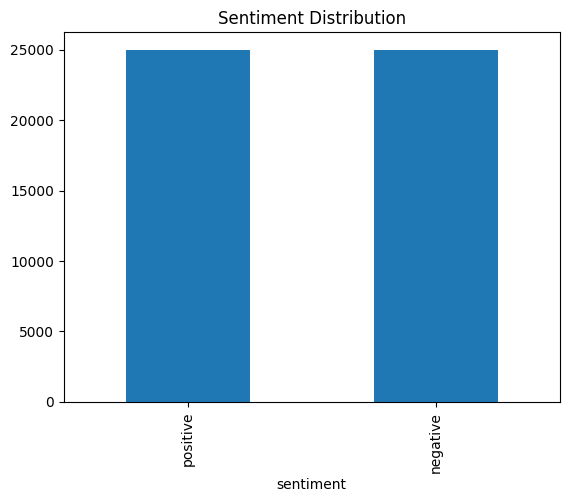

In [10]:
data['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()

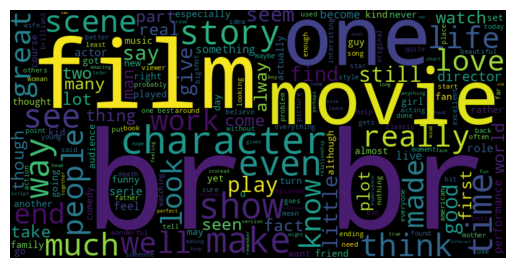

In [11]:
positive_reviews = ' '.join(data[data['sentiment'] == 'positive']['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature Engineering

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_reviews']).toarray()
y = data['sentiment'].map({'positive': 1, 'negative': 0}).values

Model Building

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8911


Model Evaluation

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


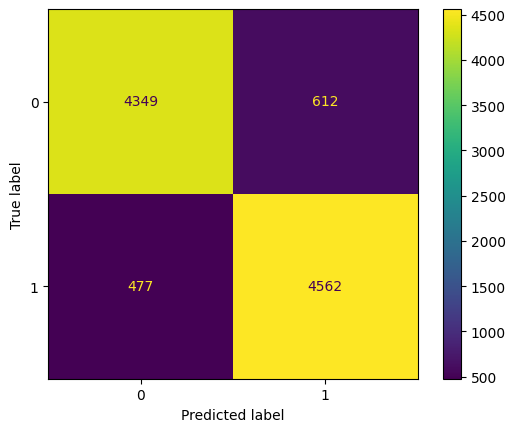

In [18]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()